<h1>Math</h1>

now we will be looking at a different algorithm for finding word vectors called GloVe : <u>Glo</u>bal <u>Ve</u>ctors for word representation

to understand how GloVe works we have to take a detour into Recommender Systems , particularly an algorithm know as <u>Matrix Factorisation</u>

so first we will be looking at Matrix Factorisation in the context of recommender systems

this is going to learn from ratings data , we have users and we have movies and we know that those users rated those movies , we can the predict what those users might rate movies they havent seen yet

the idea is pretty simple , if we think someone is going to rate a movie very highly , then we should probably recommend this movie to them

using this as a starting point , we are going to derive the solution for matrix factorisation , then we are going to see how matrix factorisation applies to the NLP scenario , to give us GloVe

<h1>Math</h1>

The first thing we want to do in our discussion of matrix factorisation is to first just describe all the basic concepts

we are going to introduce some new variables , so we want to understand what these variables mean in terms of real world measurements

we will also look at some basic intuition behind why matrix factorisation works

---

<h4>Recommender Systems - Basic Concepts</h4>

lets start by some basic intuition , we have users and we have movies (or just some generic item/product)

After we purchase a product or watch a movie , we have an opportunity to rate it and tell the system whether we liked it or not

so on some sites this may be a thumbs up/down or a rating out of 5 stars

---

<h4>The User-Movie Ratings Matrix</h4>

what we are going to do is store all of these ratings in a big matrix called $R$

The users go along the rows and the movies go along the columns

<img src='extras/29.1.PNG' width='400'></img>

so the entry $R(i,j)$ tells us what user $i$ rated movie $j$

for N users (N rows) and M items (M columns) , $shape(R) = N\times M$

---

<h4>Most values are missing</h4>

what is important to remember is that not all values in this matrix are filled in , in fact most of the values in $R$ are miising/empty

<img src='extras/29.2.PNG' width='300'></img>

This is because most users have not rated most movies , so we say that $R$ is a sparse matrix

It is important to explain what we mean by sparse in this context , by saying sparse we do not mean that $R$ has lots of zeros , since in our case a value of 0 just implies a very bad rating , in our rating matrix sparse means that the value is not there at all

---

<h4>Sparsity is good</h4>

In reality having missing values is a good thing , lets think about why that might be

It helps to remember what the application is , Recommender systems , since the job of one is to tell us about a movie that we might like but have not seen yet , for a non-sparse matrix , one where every user has seen and rated every movie , there is nothing to recommend to users

As much as sparsity as it may seem as an inconvenience it remaons a necessary condition for us to be able to build a recommender system in the first place

---

<h4>Collaborative Filtering</h4>

Matrix factorisation is an example of a class of algorithms known as Collaborative Filtering

The idea behind Collaborative Filtering is that , out of all the users in our database , there are going to be other users which are similar to us 

similar to us but not exactly the same as us ,  meaining that we have some movies in common that we both liked , of course there are still some movies that we have seen but other have not and vice versa and that forms the basis of recommendations

Users that are similar to us that have liked a movie that we have not seen yet would be a good recommendation for us

as an example , lets look at this small table of users & movies ratings

<img src='extras/29.3.PNG' width='600'></img>

we can see that both Alice and Bob seem to both like Action movies but they dislike Romance

Carol on the other hand seem to have the opposite opinion , Carol likes Romance movies but dislikes action movies

So Alice is similar to Bob , but both are dissimilar to Carol

we can see that there is one rating missing here , Bob has not yet seen Star Wars

It should be pretty intuitive to try and guess whether or not Bob would like star wars

We know that Alice and Bob have very similar ratings , what Alice likes Bob also likes , and since Alice likes star wars we can use the fact that they are similar to estimate that Bob might also like star wars , and so we can recommend star wars to Bob

---

<h4>NLP data is similar</h4>

well , this is not the first time we have seen a pattern like this and in fact we dont have to look further than NLP itself

Think of a word document matrix , we have words going along the rows and documents going along the columns

<img src='extras/29.4.PNG' width='500'></img>

if we consider each row to be a feature vector , how dow we know that two words are similar ?

well its simply that there feature vectors are close together

In simpler terms , this means that the words 'quantum' and 'gravity' are similar because when the count of 'quantum' is high the count of 'gravity' is high

'quantum' and 'mitochondria' are dissimilar because when the count of quantum is high , the count of 'mitochondria' is low and vice versa

on the other hand the words 'mitochondria' and 'cell membrane' are similar to each other

---

<h4>Key Property : Redundancy</h4>

In machine learning terms we can think of redundancy as two features being correlated with one another , in a way that knowing both doesnot give us any more information than just knowing one by itself

one example of that is measuring someone's height , if we have the heights in cm we dont need to know the heights in inches , both give us the exact same information , in fact the height in inches is actually perfectly correlated to height in cm , one is jsut the other multiplied by a constant , so one completely determines the other

similarly ocuments might be redundant , we might have 1 million documents about physics but do we need 1 million documents to tell us that the words 'quantum' and 'gravity' are related ? probably not

In the ratings case , movies can be redundant as well , suppsoe that everyone who likes Star Wars Episode 1 also likes Star Wars Episode 2 , then it would be easy to predict the rating for one movie given the rating for the other

---

<h4>How do we exploit redundancy ?</h4>

In all these cases we can exploit the property of redundancy to build a model that reduces the dimensionality of the data , sound complicated , but the key term here is dimensionality reduction

one method of dimensionality reduction is SVD (singular value decomposition)

Basically it means that we are going to decompose some matrix X into three seperate matricies U,S,V

$$X = USV^T$$

---

<h4>How is it 'reduced'</h4>

what exaclty makes this dimensionality reduction ?

In the following scenario

<img src='extras/29.5.PNG' width='400'></img>

U,S,V are able to exactly reconstruct the original matrix X , but this is not really a reduction , U is already the same size as X and so U,S,V all together take up more space than original X

---

<h4>We can "chop off" parts of U,S,V</h4>

what if we reduce the size of U,S,V ?

suppose we cut-off the right side of U , the bottom right corner of S and the bottom of $V^T$ , then that means that 

<img src='extras/29.6.PNG' width='400'></img>

if we choose K to be much smaller than D (K<<D) then we will reduce the amount of space needed to reconstruct X

As for why we are allowed to do this , we will discuss SVD in detail later

---

<h4>Quick Calculations</h4>

lets put some real numbers on these dimensions so we get some sense on the savings we get

N = 1 million , D = 500,000 , K = 10

size(X) = NxD = $10^6 \times 5 \times 10^5 = 5 \times 10^{11}$ 

size(U) = NxK = 10 million

size(S) = 10x10 = 100

size(V) = 500,000x10 = 5 million

15 million / 500 billion = $3 \times 10^{-5}$

so we do save a significant amount of space by doing this

---

<h4>Actually , we dont have to know about SVD :) </h4>

The reason is SVD doesnot actually work for recommender systems , there are several reasons for this 

first is that ratings matrix has missing values so even if we wanted to use SVD it wouldnt work since it requires every value to be filled in

second reason is , in its usual implementations (e.g. SKLearn) , SVD wont scale to large number of users / items

---

<h4>Matrix Factorisation</h4>

so what is Matrix Factorisation ?

Think about factors in genral , that means something can be expressed as multiple things usually smaller than the original multiplied together

for ex: 15 = 3x5 , 10 = 5x2

so numbers can be vectorised into a product of smaller numbers as long as they are not prime numbers

similarly matricies can also be factorised , in fact SVD is also a factorisation ,but not just the factorisation we want

what we want is factorise $R$ into seperate smaller matricies W,U

$$R \approx \hat R = WU^T$$

---

<h4>Again , what are the savings ?</h4>

N = 100,000 . M = 20,000

size(R) = $10^5 \times 2 \times 10^4 = 2 $ billion

but suppose we have only 20 million ratings as we do in the MovieLens dataset (a popular movie ratings dataset) , 20 million / 2 billion = 0.01 , thats only 1% of values in the NxM matrix being filled in  , and 99% of the values are empty , in reality the number of movies and users is actually larger , so this si even more sparse

lets choose K = 10

size(W) = NxK = 1 million

size(U) = MxK = 200,000

so in toal we have 1.2 million parameters / 20 million ratings = 6% of the size of our dataset , which is a good thing since we never want to over-parameterise our model which could lead to over-fitting

---

<h4>How do we use the model ?</h4>

if we notice , what happens when we multiply W by $U^T$ ?

well , we get a full NxM matrix without any missing values !

$$R \approx \hat R = WU^T$$

in particular all of these values are rating predictions , any entry $\hat r_{ij}$ is a prediction for what use $i$ would rate movie $j$

if we want to get a single prediction , we dontt have to multiple all of W by all of U , all what we need to do is:

$$\hat r_{ij} = W^T_{i}U_{j}$$

which is much faster

in fact this is exactly how we can make recommendations , basically for any entry in $r$ that is not yet filled in , meaning a movie we have not rated yet , meaining a movie that can be possibly recommended to us , then what we can do is find all $\hat r$s for all the movies we havent seen and then sort them by the predicted rating , the highest predicted rating is our top recommendation

---

<h4>Why does it make sense</h4>

suppose we have some vector $w_i$ of size K and some vector $u_j$ of size K and we take the dot product , what does the dot product tell us ?

we know that the dot product tells us how similar or different two vectors are , we call is cosine similarity since the dot product is proportional to the cosine of the angle between the two vectors

$$sim(A,B) = cos(\theta) = \frac{A \cdot B}{\Vert A \Vert \Vert B \Vert}$$

so what does it mean to say a user vector and a movie vector are similar ?

each of the K-dimensions represents a latent feature , but we can pretend that they are real meaningful features

for ex , one feature may represent the action-adventure genre , another feature any represent comedy , romance etc.

---

<h4>Example</h4>

lets say we have a latent dimensionality of 3 and features represent :

<ul>
    <li>Action-adventure</li>
    <li>Comedy</li>
    <li>Romance</li>
</ul>

 for User vector w = [1,0,-1]

<ul>
    <li>likes action-adventure</li>
    <li>doesnot care about comedy</li>
    <li>dislikes romance</li>
</ul>

now lets say we hace a movie in the action adventure genre , its pretty funny too so it might also fall under comdey, but there is nor romance in it , so an appropriate movie vector might be

movie vector u = [1,1,0]

<ul>
    <li>Has action-adventure</li>
    <li>Has comedy</li>
    <li>No romance</li>
</ul>

and if we dot these two vectors together , then $w^Tu = +1$

now lets say we have another movie which is a romance movie , it definetly doesnot have any action/adventure but it has some comedy

movie vector u = [-1,1,1]

<ul>
    <li>Defenitely no action-adventure</li>
    <li>Has comedy</li>
    <li>Lots of romance</li>
</ul>

then if we dot these movie vector with our user vector , we get $w^Tu = -2$

with this scheme , we can see that positive corelations yeild positive numbers whereas negative correlation yeild negative numbers

0 seems to be neautral , which suggest that we should probably center our ratings in the implementation

---

<h4>Evaluating the model</h4>

Essentially we can only evaluate the accuracy of our model on ratings that are known

in particular , we can call $\Omega$ the set of all existing ratings , it consists of i,j tuples , i represents the user and j represents the movie

and so our cost function , since this is a regression is the squared error over all known ratings :

$$J = \sum_{i,j \in \Omega} {\left( r_{ij} - \hat r_{ij} \right)}^2$$

$\Omega = $ set of all pairs (i,j) where user i rated movie j

in other words , we sum over all the pairs i,j which are in $\Omega$ and take the squared error between the actual rating and tour model's predicted rating

This is analogous to what we do in SVD which tries to optimise the squared error between the original X and the reconstructed X

$$J = \sum^N_{i=1}\sum^D_{j=1} {\left( X_{ij} - \hat X_{ij} \right)}^2$$

---

<h4>More Symbols</h4>

we will introduce these now , later we will know why there are useful

$\Omega_j =$ j represents a movie , set of all users i who have rated movie j

$\Psi_i = $ i represents a user , set of all movies j that have been rated by user i

---

<h4>What do we do now ?</h4>

The same thing we always do in machine learning , once we have a cost function our job is to minimise it with respect to the parameters of our model $W \ and \ U$

In addition we will be adding some few more typical machine learning features like bias and regularisation

finally we will jump back to GloVe and we will see how matrix factorisation can be used in NLP to find word vectors

<h1>Math</h1>

Now we want to talk about how to train the matrix factorisation model

---

<h4>Training</h4>

Previously we discussed that what we want to do is create two matricies that when multiplied together approximate $R$ , our ratings matrix , and we call this $\hat R$

$$R \approx \hat T = WU^T$$

Since $\hat R$ is an approximation of $R$ we would like them to be close together , so how can we ensure this ?

---

<h4>Squared error Loss</h4>

since this is regression , we know that the way to do this is the sum of squared errors , technically we could also look at the mean squared error as we have been , but that just divides the dataset by the size which is a constant and has no effect on the answer , so for the purpose of the derrivation we are going to ingnore it

$$J = \sum_{i,j \in \Omega} {\left(r_{ij} - \hat r_{ij}\right)}^2 = \sum_{i,j \in \Omega} {\left( r_{ij} - w_{i}^Tu_j\right)}^2$$

$$\Omega = set \ of \ pairs \ (i,j) \ where \ user \ i \ rated \ movie \ j$$

---

<h4>Minimise the loss</h4>

As usual now that we have our loss function , what we would like to do is set the gradient to 0 and solve for $W \ and \ U$

so the process is the same as what we always do

---

<h4>Solving for W</h4>

lets derive the expression for $W$ first

whats challenging about this is , we have to be very careful about which sets of data we are currently looking at

recall that :

$\Omega =$ represents the set of pairs (i,j) , where use i has rated movie j

$\Psi_i = $ set of all movies j that have been rated by user i

since we are taking the derivative wrt $w_i$ we only care about the subset of ratings that actually depend on $w_i$ and hence the summation covers only the movies that user $i$ have rated

from here the derivative is pretty straightforwad

$$\frac{\partial J}{\partial w_i} = 2 \sum_{j \in \Psi_i} \left( r_{ij} - w_i^Tu_j \right) \left( - u_j \right) = 0$$

the next step is to set this to 0 and try to isolate $w_i$

$$\sum_{j \in \Psi_i} \left( w_i^T u_j \right) u_j = \sum_{j \in \Psi_i} r_{ij}u_j$$

At this point seems might seem a little messy , because what we have is $w_i^T$ and its not immediately clear how to isolate $w_i$ by itself without the transpose , as we can see its stuck inside a dot product

The trick here is to remember that Dot product is commutative , so it doesnot matter what order we multiply the operands in , so $w_i^Tu_j = u_j^Tw_i$

$$\sum_{j \in \Psi_i} \left( u_j^T w_i \right) u_j = \sum_{j \in \Psi_i} r_{ij}u_j$$

The next thing to remember is that the result of a dot product is a scalar , a number

and we know that 

$$scalar \times vector = vector \times scalar$$

so we can just move $u_j$ to the other side

$$\sum_{j \in \Psi_i} u_j \left( u_j^T w_i \right) = \sum_{j \in \Psi_i} r_{ij}u_j$$

next we can drop the brackets , everything here is a multiplication so that is okay

$$\sum_{j \in \Psi_i} u_j  u_j^T w_i  = \sum_{j \in \Psi_i} r_{ij}u_j$$

Next we need to remember that this is a summation over $j$ , $w_i$ doesnot depend on $j$ therefore it doesnot actually need to be inside summation

so once we bring it outside summation , the solution is clear

$$\left( \sum_{j \in \Psi_i} u_j u_j^T \right) w_i = \sum_{j \in Psi_i} r_{ij} u_j$$

so now we arrive at the familiar form $Ax = b$ which is a matrix multiplied by a vector = another vector

we solve for x by inverting A and multiplying by the vector on the right

$$w_i = {\left( \sum_{j \in \Psi_i} u_j u_j^T \right) }^{-1} \sum_{j \in Psi_i} r_{ij} u_j $$

but we never actually want to do that calculation in code , instead numpy has a special solve function where we pass in A and b directly and it uses a special algorithm to solve for x , which is both faster and more accurate

```python
x = np.linalg.solve(A,b)
```
---

<h4>Solving for U</h4>

next we solve for $u_j$

notice how the loss function is symmetric in both $w_i$ and $u_j$ so the steps here are no different , just that the rules of $w_i$ and $u_j$ are reversed

as before the next step we need to be careful with is determining what we need to sum over

since we only want terms involving $u_j$ that means we only want the users i who rated item j , so that $\Omega_j$

as before the derivative is trivial

$$\frac{\partial J}{\partial u_j} = 2 \sum_{i \in \Omega_j} \left( r_{ij} - w_i^Tu_j\right)\left(-w_i\right) = 0$$

next we set the derivative to 0 and isolate each term

$$\sum_{i \ in \Omega_j} \left(w_i^Tu_j\right)w_i = \sum_{i\in\Omega_j} r_{ij}w_i$$

next we change the order of the dot prodcut so we can bring $u_j$ outside of the summation

$$\sum_{i \in \Omega_j} = w_iw_i^Tu_j = \sum_{i \in \omega_j }r_{ij}w_i$$

and now we can add new brackets to make it cleat that $u_j$ is not part of the summation and that inside the summation we have an outer product

$$\left(\sum_{i \in \Omega_j}w_iw_i^T\right)u_j = \sum_{i \in \Omega_j}r_{ij}w_i$$

finally we can bring the matrix on theleft t o the right by inverting it

$$u_j = {\left( \sum_{i \in \Omega_j} w_iw_i^T \right)}^{-1} \sum_{i \in \Omega_j} r_{ij} w_i$$

again we wont actually invert it in code

---

<h4>2-way dependancy</h4>

so now we are at a place we havet encountered before

The thing with this is we have sort of  this two way dependancy 

<ul>
    <li>Solution for W depends on U</li>
    <li>Solution for U depends on W</li>
</ul>

we might then ask whether is it is possible to plu one equation in the other to isolate the two variables , in a sense thats possible but that not actually what we want to do

The issue is we would still have two seperate steps , there is not just one global equation , and this is the nature of our model

we have two parameters W and U and therefore they both need to be updated

---

<h4>Training algorithm</h4>

so instead the algorithm is just to apply the equations as is

in other words we start with a random initialisation for W and U , then in a loop we just apply these 2 equations


$W = randn(N,K) \ , U = randn(M,K)$

$for \ t \ in \ range(T):$

$$w_i = {\left( \sum_{j \in \Psi_i} u_j u_j^T \right) }^{-1} \sum_{j \in Psi_i} r_{ij} u_j $$

$$u_j = {\left( \sum_{i \in \Omega_j} w_iw_i^T \right)}^{-1} \sum_{i \in \Omega_j} r_{ij} w_i$$

first we update all the $w$s then we update all the $u$s

then we loop back around and update all the $w$s again

in ML this algorithm is called <strong>"Alternating Least Squares"</strong>

it has been proven that on each step we always get closer to a local minimum

---

<h4>Q$\&$A</h4>

Q : Does it matter which order do we update in  ? (w first or u first)

A : No it doesnot matter , remember that the loss is symmetric in both $w$ and $u$ , they both play the same mathematical role in the equation

Q : since $w$ depends on $u$ and $u$ depends on $w$ should we use theold values of $w$ when we update $u$ if the update for $u$ comes second

A : Also doesnot matter , but in this case , as it is with neural networks , things tend to go faster if we simply use whatever value exists in $w$ at the time when we are updating $u$

computationally this is better also , if we want to use the old value of $w$ we would have to make a copy of it on each round which is expensive

and keep in mind that we alternating anyway , so $w$ is still going to use the latest version of u

<h1>Math</h1>

next we will look at the first expansion of the basic matrix factorisation algorithm that we just learned

---

<h4>Linear Regression</h4>

Think about the linear regression model

$$\hat y = mx + b$$

what we can see with this is that there are two parameters of interest , the first is the slope and the second is the y-intercept

The y-intercept controls how much the line is pushed upwards on the x-y plane , without this the line would always be forced to pass through the origin , which may not actually fit our dataset

---

<h4>Similarity</h4>

now lets reconsider cosine similarity

if we take two vectors that are negatively correlated , the result is going to be a negative number

But intuitively we know that this is not good for 5 star ratings because 5 star ratings are generally positive not centered around 0

note : if $w_i$ and $u_j$ are negatively correlated , then $w_i \cdot u_j$ will be negative , ratings cant be negative , recall that $A \cdot B = \Vert A \Vert \cdot \Vert B \Vert  \cos(\theta)$

---

<h4>Bias Terms</h4>

first lets consider why we would need something like user bias

it has to do with the fact that different people rate things differently , different numbers mean different things to different people

Ex: Uber ratings , it is well known that even though Uber ratings are on a 5 star scale , people consider an average rating of 4.5 to be a 'poor' rating , so for an Uber driver with a rating 4.5/5 , one might be very suspicious of what could be wrong with that driver

sometimes people say 2.5 is average , for others 2.5 means something very very bad , some people might think of 75% (B) as average , some might consider A- or C as average

The point of this is users have biases , some users are very optimistic , meaning they rate everything highly , other users are vey pessimistic meaning they rate everything low

so if on average , we rate everyting at 2.5 , then if we rate something at 3.5 that must mean we think it is really great

on the other hand , if we rate everything a 4.5 on average , then a rating of 3.5 coming from us probably means it is pretty bad

---

<h4>Bias Terms</h4>

similarly we like to introduce bias terms into the matrix factorisation problems

here is our equation

$$\hat r_{ij} = w_i^Tu_j + b_i + c_j + \mu$$

$b_i = users \ bias$

$c_j = movie \ bias$

$\mu = global average$


normally with simple ML model (ex:linear regression) , we only need one bias term , but for MF (matrix factorisation) we would like to have 3

lets start with $\mu$ , the global average , we can think of this as centering the dataset

if we plotted a histogram of all the ratings , this would be like shifting it so that the mean is 0

The reason we would like both a user bias and a movie bias is because both these dimensions can be biased

we discussed user-bias laready (optimistic vs pessimistic) , what about movie bias ?

---

<h4>Movie Bias</h4>

Think of a universally well-liked movie like James Cameron's Avatar

Our unbiased MF model might have latent features that capture the fact that :

<ul>
    <li>Sci-fi</li>
    <li>Aliens</li>
    <li>Humans fightning aliens</li>
</ul>

But are these attributes enough to predict how much we will like the movie ?

surely there are other movies that have all these attributes yet perform very poorly

one ex: Battlefiel Earth , widely regarded as the worst sci-fi movie of all time

so to conclude having a movie bias is probably a good idea

---

<h4>Training</h4>

Now that we have a new model , we have to reconsider how to train it

since we already derived the update equation , it should not be hard to add some few terms

once again , our loss is :

$$J = \sum_{i,j \in \Omega} {\left(r_{ij}=\hat r_{ij}\right)}^2$$

our prediction is :

$$\hat r_{ij} = w_i^Tu_j + b_i + c_j + \mu$$

from this we can see that we need to solve for $w_i,u_j,b_i,c_j$

---

<h4>Solving for W</h4>

differentiate wrt $w_i$

$$\frac{\partial J}{\partial w_i} = 2 \sum_{j \in \Psi_i} \left(r_{ij} - w_i^Tu_j - b_i - c_j - \mu \right)\left(- u_j\right) = 0$$

the next step is to move all the terms that do not involve $w_i $ to the right side

$$\sum_{j \in \Psi_i} \left( w_i^T u_j\right) u_j = \sum_{j \in \Psi_i} \left(r_{ij} - b_i - c_j - \mu \right) u_j$$

from here it is simple since all we have to do is isolate $w_i$ like we did before

$$w_i = {\left(\sum_{j \in \Psi_i}u_ju_j^T\right)}^{-1} \sum_{j \in \Psi_i} \left( r_{ij} - b_i - c_j - \mu \right) u_j$$

---

<h4>Solving for U</h4>

since the equations for $u_i$ and $w_j$ are symmetric , we can apply the same logic to get the update for $u_j$

$$u_j = {\left(\sum_{j \in \Omega_i}w_iw_i^T\right)}^{-1} \sum_{j \in \Omega_i} \left( r_{ij} - b_i - c_j - \mu \right) w_i$$

--- 

<h4>Solving for b</h4>

$$\frac{\partial J}{\partial b_i} = 2 \sum_{j \in \Psi_i} \left( r_{ij} - w_i^Tu_j - b_i - c_j - \mu\right)(-1)$$

then isolate $b_i$ , just move everything to the other side

one important thing to remeber is that $b_i$ is still inside a summation , since the summation is on $j$ , we can get it out of the summation , to do this we can say that $b_i = b_i \times 1$ then leave the one inside the summation , and one summed up this many times gives us $\vert \Psi_i \vert$ , thats the number of elements in the set $\Psi_i$ , that is the number of movie user $i$ has rated

$$b_i = \frac{1}{\vert\Psi_i\vert} \sum_{j \in \Psi_i} \left( r_{ij} - w_i^Tu_j - c_j - \mu\right)$$

this makes sense since if we are summing up that many items we need to balance it out by dividing by the number of items

we can actually see that this update is pretty intuitive , the bias for user $i$ is the average deviation of the actual rating - every part of the model except $b_i$ it self

Thats basically the very definition of $b_i$ , the bias $b_i$ is essentially what would make the model more accurate compared to if the model did not have $b_i$ at all

---

<h4>Solving for c</h4>

finally , we can similarly derive the update for $c_j$ by taking the exact same steps

$$\frac{\partial J}{\partial c_j} = 2 \sum_{i \in \Omega_i} \left( r_{ij} - w_i^Tu_j - b_i - c_j - \mu\right)(-1)$$

As we can see the derivative is nearly identical , the only difference here is what we sum over which is now all the users who rated movie $j$

as before we isolate $c_j$ by moving everything else to the right side 

$$c_j = \frac{1}{\vert \Omega_j \vert} \sum_{i \in \Omega_j} \left(r_{ij} - w_i^Tu_j - b_i - \mu\right)$$

and again we can see that this is just the average deviation of the actual rating from the prediction if the model did not contrain $c_j$

---

we dont need to update global average , we just calculate it directly from train data

---

<h4>summary</h4>

$$w_i = {\left(\sum_{j \in \Psi_i}u_ju_j^T\right)}^{-1} \sum_{j \in \Psi_i} \left( r_{ij} - b_i - c_j - \mu \right) u_j$$

$$u_j = {\left(\sum_{j \in \Omega_i}w_iw_i^T\right)}^{-1} \sum_{j \in \Omega_i} \left( r_{ij} - b_i - c_j - \mu \right) w_i$$

$$b_i = \frac{1}{\vert\Psi_i\vert} \sum_{j \in \Psi_i} \left( r_{ij} - w_i^Tu_j - c_j - \mu\right)$$

$$c_j = \frac{1}{\vert \Omega_j \vert} \sum_{i \in \Omega_j} \left(r_{ij} - w_i^Tu_j - b_i - \mu\right)$$

<h1>Math</h1>

next we introduce the final modification to our basic matrix factorisation model , then we will be ready for implementation

---

<h4>Regularisation</h4>

our final modification is adding regularisation to our matrix factorisation model

Regulaisation , as we recall , is a technique that helps to prevent overfitting

and with such a sparse rating matrix we can imagine that this can be very useful

lets start by looking at what regularisation looks like for linear regression

Model: $\hat y = w^T x$

just a hyper-plane

Objective: $J = \sum\limits^N_{i=1}(y_i-\hat y_i)^2 + \lambda {\Vert w \Vert}_2^{\ \ 2}$

the cost function is just the sum of two terms , the squared error , which we are already familiar with , and the squared magnitude of the weights themselves

The second term is sometimes called the penalty term , the idea is , if the weight becomes too large , thats a good sign of overfitting , so large weights are penalised

Solution : $w = {\left(\lambda I + X^TX\right)}^{-1}X^Ty$

it is also helpful to look at the solution for $w$ , since the solution for linear regression looks very similar to MF

---

<h4>Regularisation in Matrix Factorisation</h4>

Basically the approach for matrix factorisation is exactly the same , we take all the parameters , and we add a constant multiplied by their square magnitude to the existing square error

$$J = \sum_{i,j \in \Omega} {\left(r_{ij} - \hat r_{ij}\right)}^2 + \lambda \left({\Vert W\Vert}_F^{\ 2}+{\Vert U\Vert}_F^{\ 2}+{\Vert b\Vert}_2^{\ 2}+{\Vert c\Vert}_2^{\ 2}\right)$$

note that when we do this on a matrix this is usually called the Frobenius Norm (which is why it is subscripted with an F)

---

<h4>Solve for W</h4>

again we solve for our new updates , this time each term appears twice so this is slightly more difficult

$$\frac{\partial J}{\partial w_i} = 2 \sum_{j \in \Psi_i} \left(r_{ij} - w_i^Tu_j - b_i - c_j - \mu \right) \left(-u_j\right) + 2\lambda w_i = 0$$

luckily the derivatives are additive so we can jsut copy and paste the part we already solved and add the new derivative

As for the Forbenius norm , remember that is is just the sum of the magnitudes of each individual element

$${\Vert W\Vert}^2 = \sum^N_{i=1}\sum^K_{k=1} {\vert w_{ik} \vert}^2 = \sum^N_{i=1} {\Vert w_i \Vert}_2^{\ 2} = \sum^N_{i=1} w_i^T w_i$$

therefore we can also split them up in terms of each row as well , once we do that we can use the fact that the squared magnitude of a vector is just the dot product of the vector with it self and we already know that the derivative of the dot product is just the vector itself

Next , all we need to do is group together like terms , in this case everything that depends on $w_i$ and everything that doesnot

$$\sum_{j \in \Psi_i} u_ju_j^Tw_i + \lambda w_i = \sum_{j \in \Psi_i} \left(r_{ij} - b_i - c_j - \mu\right)u_j$$

from here we can see that we can factor out $w_i$

$$\left(\sum_{j \in \Psi_i} u_ju_j^T + \lambda I \right) w_i = \sum_{j \in \Psi_i} \left( r_{ij} - b_i -c_j - \mu \right) u_j$$

then again we apply our usual solution

$$ w_i = {\left(\sum_{j \in \Psi_i} u_ju_j^T + \lambda I \right)}^{-1}  \sum_{j \in \Psi_i} \left( r_{ij} - b_i -c_j - \mu \right) u_j$$

---

<h4>Solve for U</h4>

as usual we dont have to go through all the same work to solve for $u_j$ since $w_i$ and $u_j$ are symmetric , so we just follow the same pattern and write down the solution


$$ u_j = {\left(\sum_{i \in \Omega_j} w_iw_i^T + \lambda I \right)}^{-1}  \sum_{i \in \Omega_j} \left( r_{ij} - b_i -c_j - \mu \right) w_i$$

---

<h4>Solve for b</h4>

following the same logic as before , the square magnitude of b is just $b \cdot b$ so the derivative wrt $b_i$ is just $b_i$ itself

$$\frac{\partial J}{\partial b_i} = 2 \sum_{j \in \Psi_i} \left(r_{ij} - w_i^Tu_j - b_i -c_j - \mu \right)(-1) + 2 \lambda b_i = 0$$

next we isolate the $b_i$ terms

$$\sum_{j \in \Psi_i}b_i + \lambda b_i = \sum_{j \in \Psi_i} \left(r_{ij} - w_i^Tu_j - c_j - \mu\right)$$

as before $b_i$ doesnot depend on j so it can be moved outside the summation

$$b_i \left\{\left(\sum_{j \in \Psi_i}\right) + \lambda \right\} = \sum_{j \in \Psi_i} \left(r_{ij} - w_i^Tu_j - c_j - \mu\right)$$

so the difference now is , we divide by $\vert \Psi_i \vert + \lambda$ , this makes sense adding $\lambda$ to the denominator makes $b_i$ smaller 

$$b_i = \frac{1}{\vert \Psi_i \vert + \lambda} \sum_{j \in \Psi_i} \left(r_{ij} - w_i^Tu_j - c_j - \mu\right)$$

---

<h4>Solve for C</h4>

again we can use the fact that $b_i$ and $c_j$ are symmetric so we can just copy the same result for $c_j$

$$c_j = \frac{1}{\vert \Omega_j \vert + \lambda} \sum_{i \in \Omega_j} \left(r_{ij} - w_i^Tu_j - b_i - \mu\right)$$

---

<h4>Summary</h4>

$$ w_i = {\left(\sum_{j \in \Psi_i} u_ju_j^T + \lambda I \right)}^{-1}  \sum_{j \in \Psi_i} \left( r_{ij} - b_i -c_j - \mu \right) u_j$$

$$ u_j = {\left(\sum_{i \in \Omega_j} w_iw_i^T + \lambda I \right)}^{-1}  \sum_{i \in \Omega_j} \left( r_{ij} - b_i -c_j - \mu \right) w_i$$

$$b_i = \frac{1}{\vert \Psi_i \vert + \lambda} \sum_{j \in \Psi_i} \left(r_{ij} - w_i^Tu_j - c_j - \mu\right)$$

$$c_j = \frac{1}{\vert \Omega_j \vert + \lambda} \sum_{i \in \Omega_j} \left(r_{ij} - w_i^Tu_j - b_i - \mu\right)$$

As promised they all follow the same format as the solution for linear regression

<h1>Math</h1>

Now we are ready to discuss GloVe

we will see that with GloVe we are just going to do some work upfront then it just becomes the matrix factorisation problem which we already know how to solve

---

<h4>GloVe</h4>

similar to word2vec what we want to do is incorporate context , specifically we are not going to build a term document matrix but rather a term-term matrix

in our term-term matrix , X(i,j) should be higher if word i appears in the context of word j often (and vice versa)

with GloVe , its the details about how we build this matrix X that are important , lets discuss those

---

first thing is we want to incorporate context distance , if a word is right beside another word then we will count that as 1 , if a word is within the context of another word with one word between them , then we count this as $\frac{1}{2}$ , if word i and word j have two words between them we will count this as $\frac{1}{3}$ and so on

so for ex :

"I love dogs and cats"

X(I,love)  += 1

X(I,dogs)  += $\frac{1}{2}$

X(I,and)  += $\frac{1}{3}$

etc .. , up to a ceertain context size

--- 

remember that words often have long-tailed distribution , that means for most of these entires we are going to have 0 values , lots of them

This is going to give us a very sparse matrix similar to what we had with our recommended system

but whereas with recommender systems we had missing values , these values are not missing they are just zeros (but both of them can be refered to as sparse matricies)

where we do have non-zero values , those values are going to be very large  , a common technique for scailing things down when they grow exponentially large is taking the log so thats what we are going to do

we cant take the log of 0 , so we add 1 to every entry then we take the log , this will be our target matrix

---

now we could construct a cost function just from what we have so far , but we wont just yet

we are going to add one more thing which researchers found to work extremely well

what we are going to do is weigh each (i,j) entry by its X value , if its X value is sufficiently large , we give it a weigh of 1 , else we give it a weight of less than 1

the function used in the original paper was :

$$f(x) = \left(\frac{X}{X_{max}}\right)^\alpha , if X < X_{max} \ , \  else \ 1$$

$alpha = 0.75 , X_{max} = 100$

our cost would then be :

$$J = \sum_i\sum_j f\left(X_{ij}\right) {\left(w_i^Tu_j - logX_{ij}\right)}^2$$

i = 1..N , j = 1..M ? , Yes - no missing values !


---

now how do we solve this problem

$$\log X_{ij} \approx w_i^Tu_j + b_i + c_j + \mu$$

In the original paper , they used gradient descent and 2 bias terms , but we will use our knowledge of matrix factorisation and recommender systems and we will try alternating least squares and 3 bias terms (then we will try gradient descent , then tensorflow)

so adding these terms our cost becomes :

$$J = \sum_i\sum_j f\left(X_{ij}\right) {\left(w_i^Tu_j + b_i + c_j + \mu - logX_{ij}\right)}^2$$


These derivatives are actually easier to solve since we dont have to think about the set of values we need to consider under the summation since there are no missing values in the target matrix

one interesting aspect of GloVe , is that the training time we spend on fitting the parameters doesnot depend on the amount of training data we have since we are always fitting to a VxV matrix

---

so here are the equations for how to update the model parameters :

$$w_i = {\left(\sum_j f(X_{ij}) u_ju_j^T\right)}^{-1} \sum_j f\left(X_{ij}\right) \left(logX_{ij} - b_i - c_j - \mu\right)u_j$$

$$u_j = {\left(\sum_i f(X_{ij}) w_iw_i^T\right)}^{-1} \sum_i f\left(X_{ij}\right) \left(logX_{ij} - b_i - c_j - \mu\right)w_i$$

$$b_i = \frac{1}{\sum\limits_j f(X_{ij})}\sum_j f\left(X_{ij}\right) \left(\log X_{ij} - w_i^Tu_j - c_j - \mu\right)$$

$$c_j = \frac{1}{\sum\limits_if(X_{ij})}\sum_i f\left(X_{ij}\right) \left(\log X_{ij} - w_i^Tu_j - b_i - \mu\right)$$












<h1>code</h1>

In [1]:
# so now we have 2 implementations :
# 1) Alternating least squares
# 2) Gradient Descent
# we will start with Alternating least Squares

In [1]:
import numpy as np
from glob import glob
import string
from sklearn.metrics.pairwise import pairwise_distances
from datetime import datetime
import json
import matplotlib.pyplot as plt

In [2]:
V = 20000
D = 300
N_FILES = None
CONTEXT_SZ = 10
XMAX = 100
ALPHA = 0.75
EPOCHS = 10
REG = 0.1
PATH = 'outputs/GloVe/ALS/'

In [3]:
def tokenise(sent):
    sent = sent.lower()
    sent = sent.translate(str.maketrans('','',string.punctuation))
    tokens = sent.split()
    return tokens

def get_sentences(path='datasets/wiki/',V=20000,n_files=None):
    files = glob(path+'*.txt')
    files = files[:n_files]
    # first we need to get word2count to identify our top words
    # we will make word2idx once we filter out the top words
    word2count = {}

    # this is a list of lists , each inner list is a sentence of indexes
    sentences = []

    # we need to limit covabulary
    # first we get word2count 
    print('counting words')

    for i,f in enumerate(files):
        for line in open(f,encoding = "utf8"):
            line = line.rstrip()
            if line and line[0] not in ('[', '*', '-', '|', '=', '{', '}'):
                # use lines instead of sentences
                lines = line.split('. ')
                for line in lines:
                    tokens = tokenise(line)
                    if len(tokens) < 2:
                        continue
                    for token in tokens:
                        word2count[token] = word2count.get(token,0) + 1

        print('finished counting : ',i+1,'/',len(files),' files')

    print('finisehd counting')
    print('processing files')

    # now we use word2count to identify most frequent words
    # we need the special <none> token to replace words that wont make it to our vocabulary
    words  = ['<start>']+['<end>']+['<none>'] + [w for (w,c) in sorted(word2count.items() , reverse=True, key=lambda x: x[1])[:V-3]] 
    word2idx = {w:i for w,i in zip(words,range(V))}
    none = word2idx['<none>']
    for i,f in enumerate(files):
        # in the wiki files each line is a paragraph , we will be taking each paragraph as a sentence
        # we also want to remove header lines
        for line in open(f,encoding = "utf8"):
            line = line.rstrip()
            # skip headers , ...
            if line and line[0] not in ('[', '*', '-', '|', '=', '{', '}'):
                lines = line.split('. ')
                for line in lines:
                    tokens = tokenise(line)
                    if len(tokens) < 2:
                        continue
                    # now we update word2idx and word2count
                    # and we append tokenised line to our sentences
                    sentence = [word2idx.get(token,none) for token in tokens]
                    sentences.append(sentence)

        print('finished processing : ',i+1,'/',len(files),' files')

    print('finished processing data')
    return sentences,word2idx


In [4]:
sentences,word2idx = get_sentences(V=V,n_files=N_FILES)

counting words
finished counting :  1 / 69  files
finished counting :  2 / 69  files
finished counting :  3 / 69  files
finished counting :  4 / 69  files
finished counting :  5 / 69  files
finished counting :  6 / 69  files
finished counting :  7 / 69  files
finished counting :  8 / 69  files
finished counting :  9 / 69  files
finished counting :  10 / 69  files
finished counting :  11 / 69  files
finished counting :  12 / 69  files
finished counting :  13 / 69  files
finished counting :  14 / 69  files
finished counting :  15 / 69  files
finished counting :  16 / 69  files
finished counting :  17 / 69  files
finished counting :  18 / 69  files
finished counting :  19 / 69  files
finished counting :  20 / 69  files
finished counting :  21 / 69  files
finished counting :  22 / 69  files
finished counting :  23 / 69  files
finished counting :  24 / 69  files
finished counting :  25 / 69  files
finished counting :  26 / 69  files
finished counting :  27 / 69  files
finished counting :  2

In [5]:
def construct_co_occurrence_matrix(sentences):
    X = np.zeros((V,V))
    N_sentences = len(sentences)
    for k,sentence in enumerate(sentences):
        # just a print to keep progress
        if (k+1)%1000 == 0:
            print('finished: ',k+1,'/',N_sentences)
        N = len(sentence)
        for i in range(N):
            start = max(i-CONTEXT_SZ,0)
            end = min(N,i+CONTEXT_SZ+1)
            w1 = sentence[i]
            
            if i-CONTEXT_SZ < 0:
                dist = i+1
                X[0][w1] += 1/dist
                X[w1][0] += 1/dist
            
            if i+CONTEXT_SZ > N:
                dist = N-i
                X[1][w1] += 1/dist
                X[w1][1] += 1/dist
                
            for j in range(start,i):
                w2 = sentence[j]
                dist = i-j
                X[w1][w2] += 1/dist
                X[w2][w1] += 1/dist
                
            for j in range(i+1,end):
                w2 = sentence[j]
                dist = j-i
                X[w1][w2] += 1/dist
                X[w2][w1] += 1/dist
    return X

In [6]:
X = construct_co_occurrence_matrix(sentences)
# free some memory
sentences = []

finished:  1000 / 3919517
finished:  2000 / 3919517
finished:  3000 / 3919517
finished:  4000 / 3919517
finished:  5000 / 3919517
finished:  6000 / 3919517
finished:  7000 / 3919517
finished:  8000 / 3919517
finished:  9000 / 3919517
finished:  10000 / 3919517
finished:  11000 / 3919517
finished:  12000 / 3919517
finished:  13000 / 3919517
finished:  14000 / 3919517
finished:  15000 / 3919517
finished:  16000 / 3919517
finished:  17000 / 3919517
finished:  18000 / 3919517
finished:  19000 / 3919517
finished:  20000 / 3919517
finished:  21000 / 3919517
finished:  22000 / 3919517
finished:  23000 / 3919517
finished:  24000 / 3919517
finished:  25000 / 3919517
finished:  26000 / 3919517
finished:  27000 / 3919517
finished:  28000 / 3919517
finished:  29000 / 3919517
finished:  30000 / 3919517
finished:  31000 / 3919517
finished:  32000 / 3919517
finished:  33000 / 3919517
finished:  34000 / 3919517
finished:  35000 / 3919517
finished:  36000 / 3919517
finished:  37000 / 3919517
finished: 

finished:  298000 / 3919517
finished:  299000 / 3919517
finished:  300000 / 3919517
finished:  301000 / 3919517
finished:  302000 / 3919517
finished:  303000 / 3919517
finished:  304000 / 3919517
finished:  305000 / 3919517
finished:  306000 / 3919517
finished:  307000 / 3919517
finished:  308000 / 3919517
finished:  309000 / 3919517
finished:  310000 / 3919517
finished:  311000 / 3919517
finished:  312000 / 3919517
finished:  313000 / 3919517
finished:  314000 / 3919517
finished:  315000 / 3919517
finished:  316000 / 3919517
finished:  317000 / 3919517
finished:  318000 / 3919517
finished:  319000 / 3919517
finished:  320000 / 3919517
finished:  321000 / 3919517
finished:  322000 / 3919517
finished:  323000 / 3919517
finished:  324000 / 3919517
finished:  325000 / 3919517
finished:  326000 / 3919517
finished:  327000 / 3919517
finished:  328000 / 3919517
finished:  329000 / 3919517
finished:  330000 / 3919517
finished:  331000 / 3919517
finished:  332000 / 3919517
finished:  333000 / 

finished:  591000 / 3919517
finished:  592000 / 3919517
finished:  593000 / 3919517
finished:  594000 / 3919517
finished:  595000 / 3919517
finished:  596000 / 3919517
finished:  597000 / 3919517
finished:  598000 / 3919517
finished:  599000 / 3919517
finished:  600000 / 3919517
finished:  601000 / 3919517
finished:  602000 / 3919517
finished:  603000 / 3919517
finished:  604000 / 3919517
finished:  605000 / 3919517
finished:  606000 / 3919517
finished:  607000 / 3919517
finished:  608000 / 3919517
finished:  609000 / 3919517
finished:  610000 / 3919517
finished:  611000 / 3919517
finished:  612000 / 3919517
finished:  613000 / 3919517
finished:  614000 / 3919517
finished:  615000 / 3919517
finished:  616000 / 3919517
finished:  617000 / 3919517
finished:  618000 / 3919517
finished:  619000 / 3919517
finished:  620000 / 3919517
finished:  621000 / 3919517
finished:  622000 / 3919517
finished:  623000 / 3919517
finished:  624000 / 3919517
finished:  625000 / 3919517
finished:  626000 / 

finished:  884000 / 3919517
finished:  885000 / 3919517
finished:  886000 / 3919517
finished:  887000 / 3919517
finished:  888000 / 3919517
finished:  889000 / 3919517
finished:  890000 / 3919517
finished:  891000 / 3919517
finished:  892000 / 3919517
finished:  893000 / 3919517
finished:  894000 / 3919517
finished:  895000 / 3919517
finished:  896000 / 3919517
finished:  897000 / 3919517
finished:  898000 / 3919517
finished:  899000 / 3919517
finished:  900000 / 3919517
finished:  901000 / 3919517
finished:  902000 / 3919517
finished:  903000 / 3919517
finished:  904000 / 3919517
finished:  905000 / 3919517
finished:  906000 / 3919517
finished:  907000 / 3919517
finished:  908000 / 3919517
finished:  909000 / 3919517
finished:  910000 / 3919517
finished:  911000 / 3919517
finished:  912000 / 3919517
finished:  913000 / 3919517
finished:  914000 / 3919517
finished:  915000 / 3919517
finished:  916000 / 3919517
finished:  917000 / 3919517
finished:  918000 / 3919517
finished:  919000 / 

finished:  1171000 / 3919517
finished:  1172000 / 3919517
finished:  1173000 / 3919517
finished:  1174000 / 3919517
finished:  1175000 / 3919517
finished:  1176000 / 3919517
finished:  1177000 / 3919517
finished:  1178000 / 3919517
finished:  1179000 / 3919517
finished:  1180000 / 3919517
finished:  1181000 / 3919517
finished:  1182000 / 3919517
finished:  1183000 / 3919517
finished:  1184000 / 3919517
finished:  1185000 / 3919517
finished:  1186000 / 3919517
finished:  1187000 / 3919517
finished:  1188000 / 3919517
finished:  1189000 / 3919517
finished:  1190000 / 3919517
finished:  1191000 / 3919517
finished:  1192000 / 3919517
finished:  1193000 / 3919517
finished:  1194000 / 3919517
finished:  1195000 / 3919517
finished:  1196000 / 3919517
finished:  1197000 / 3919517
finished:  1198000 / 3919517
finished:  1199000 / 3919517
finished:  1200000 / 3919517
finished:  1201000 / 3919517
finished:  1202000 / 3919517
finished:  1203000 / 3919517
finished:  1204000 / 3919517
finished:  120

finished:  1454000 / 3919517
finished:  1455000 / 3919517
finished:  1456000 / 3919517
finished:  1457000 / 3919517
finished:  1458000 / 3919517
finished:  1459000 / 3919517
finished:  1460000 / 3919517
finished:  1461000 / 3919517
finished:  1462000 / 3919517
finished:  1463000 / 3919517
finished:  1464000 / 3919517
finished:  1465000 / 3919517
finished:  1466000 / 3919517
finished:  1467000 / 3919517
finished:  1468000 / 3919517
finished:  1469000 / 3919517
finished:  1470000 / 3919517
finished:  1471000 / 3919517
finished:  1472000 / 3919517
finished:  1473000 / 3919517
finished:  1474000 / 3919517
finished:  1475000 / 3919517
finished:  1476000 / 3919517
finished:  1477000 / 3919517
finished:  1478000 / 3919517
finished:  1479000 / 3919517
finished:  1480000 / 3919517
finished:  1481000 / 3919517
finished:  1482000 / 3919517
finished:  1483000 / 3919517
finished:  1484000 / 3919517
finished:  1485000 / 3919517
finished:  1486000 / 3919517
finished:  1487000 / 3919517
finished:  148

finished:  1737000 / 3919517
finished:  1738000 / 3919517
finished:  1739000 / 3919517
finished:  1740000 / 3919517
finished:  1741000 / 3919517
finished:  1742000 / 3919517
finished:  1743000 / 3919517
finished:  1744000 / 3919517
finished:  1745000 / 3919517
finished:  1746000 / 3919517
finished:  1747000 / 3919517
finished:  1748000 / 3919517
finished:  1749000 / 3919517
finished:  1750000 / 3919517
finished:  1751000 / 3919517
finished:  1752000 / 3919517
finished:  1753000 / 3919517
finished:  1754000 / 3919517
finished:  1755000 / 3919517
finished:  1756000 / 3919517
finished:  1757000 / 3919517
finished:  1758000 / 3919517
finished:  1759000 / 3919517
finished:  1760000 / 3919517
finished:  1761000 / 3919517
finished:  1762000 / 3919517
finished:  1763000 / 3919517
finished:  1764000 / 3919517
finished:  1765000 / 3919517
finished:  1766000 / 3919517
finished:  1767000 / 3919517
finished:  1768000 / 3919517
finished:  1769000 / 3919517
finished:  1770000 / 3919517
finished:  177

finished:  2020000 / 3919517
finished:  2021000 / 3919517
finished:  2022000 / 3919517
finished:  2023000 / 3919517
finished:  2024000 / 3919517
finished:  2025000 / 3919517
finished:  2026000 / 3919517
finished:  2027000 / 3919517
finished:  2028000 / 3919517
finished:  2029000 / 3919517
finished:  2030000 / 3919517
finished:  2031000 / 3919517
finished:  2032000 / 3919517
finished:  2033000 / 3919517
finished:  2034000 / 3919517
finished:  2035000 / 3919517
finished:  2036000 / 3919517
finished:  2037000 / 3919517
finished:  2038000 / 3919517
finished:  2039000 / 3919517
finished:  2040000 / 3919517
finished:  2041000 / 3919517
finished:  2042000 / 3919517
finished:  2043000 / 3919517
finished:  2044000 / 3919517
finished:  2045000 / 3919517
finished:  2046000 / 3919517
finished:  2047000 / 3919517
finished:  2048000 / 3919517
finished:  2049000 / 3919517
finished:  2050000 / 3919517
finished:  2051000 / 3919517
finished:  2052000 / 3919517
finished:  2053000 / 3919517
finished:  205

finished:  2303000 / 3919517
finished:  2304000 / 3919517
finished:  2305000 / 3919517
finished:  2306000 / 3919517
finished:  2307000 / 3919517
finished:  2308000 / 3919517
finished:  2309000 / 3919517
finished:  2310000 / 3919517
finished:  2311000 / 3919517
finished:  2312000 / 3919517
finished:  2313000 / 3919517
finished:  2314000 / 3919517
finished:  2315000 / 3919517
finished:  2316000 / 3919517
finished:  2317000 / 3919517
finished:  2318000 / 3919517
finished:  2319000 / 3919517
finished:  2320000 / 3919517
finished:  2321000 / 3919517
finished:  2322000 / 3919517
finished:  2323000 / 3919517
finished:  2324000 / 3919517
finished:  2325000 / 3919517
finished:  2326000 / 3919517
finished:  2327000 / 3919517
finished:  2328000 / 3919517
finished:  2329000 / 3919517
finished:  2330000 / 3919517
finished:  2331000 / 3919517
finished:  2332000 / 3919517
finished:  2333000 / 3919517
finished:  2334000 / 3919517
finished:  2335000 / 3919517
finished:  2336000 / 3919517
finished:  233

finished:  2586000 / 3919517
finished:  2587000 / 3919517
finished:  2588000 / 3919517
finished:  2589000 / 3919517
finished:  2590000 / 3919517
finished:  2591000 / 3919517
finished:  2592000 / 3919517
finished:  2593000 / 3919517
finished:  2594000 / 3919517
finished:  2595000 / 3919517
finished:  2596000 / 3919517
finished:  2597000 / 3919517
finished:  2598000 / 3919517
finished:  2599000 / 3919517
finished:  2600000 / 3919517
finished:  2601000 / 3919517
finished:  2602000 / 3919517
finished:  2603000 / 3919517
finished:  2604000 / 3919517
finished:  2605000 / 3919517
finished:  2606000 / 3919517
finished:  2607000 / 3919517
finished:  2608000 / 3919517
finished:  2609000 / 3919517
finished:  2610000 / 3919517
finished:  2611000 / 3919517
finished:  2612000 / 3919517
finished:  2613000 / 3919517
finished:  2614000 / 3919517
finished:  2615000 / 3919517
finished:  2616000 / 3919517
finished:  2617000 / 3919517
finished:  2618000 / 3919517
finished:  2619000 / 3919517
finished:  262

finished:  2869000 / 3919517
finished:  2870000 / 3919517
finished:  2871000 / 3919517
finished:  2872000 / 3919517
finished:  2873000 / 3919517
finished:  2874000 / 3919517
finished:  2875000 / 3919517
finished:  2876000 / 3919517
finished:  2877000 / 3919517
finished:  2878000 / 3919517
finished:  2879000 / 3919517
finished:  2880000 / 3919517
finished:  2881000 / 3919517
finished:  2882000 / 3919517
finished:  2883000 / 3919517
finished:  2884000 / 3919517
finished:  2885000 / 3919517
finished:  2886000 / 3919517
finished:  2887000 / 3919517
finished:  2888000 / 3919517
finished:  2889000 / 3919517
finished:  2890000 / 3919517
finished:  2891000 / 3919517
finished:  2892000 / 3919517
finished:  2893000 / 3919517
finished:  2894000 / 3919517
finished:  2895000 / 3919517
finished:  2896000 / 3919517
finished:  2897000 / 3919517
finished:  2898000 / 3919517
finished:  2899000 / 3919517
finished:  2900000 / 3919517
finished:  2901000 / 3919517
finished:  2902000 / 3919517
finished:  290

finished:  3152000 / 3919517
finished:  3153000 / 3919517
finished:  3154000 / 3919517
finished:  3155000 / 3919517
finished:  3156000 / 3919517
finished:  3157000 / 3919517
finished:  3158000 / 3919517
finished:  3159000 / 3919517
finished:  3160000 / 3919517
finished:  3161000 / 3919517
finished:  3162000 / 3919517
finished:  3163000 / 3919517
finished:  3164000 / 3919517
finished:  3165000 / 3919517
finished:  3166000 / 3919517
finished:  3167000 / 3919517
finished:  3168000 / 3919517
finished:  3169000 / 3919517
finished:  3170000 / 3919517
finished:  3171000 / 3919517
finished:  3172000 / 3919517
finished:  3173000 / 3919517
finished:  3174000 / 3919517
finished:  3175000 / 3919517
finished:  3176000 / 3919517
finished:  3177000 / 3919517
finished:  3178000 / 3919517
finished:  3179000 / 3919517
finished:  3180000 / 3919517
finished:  3181000 / 3919517
finished:  3182000 / 3919517
finished:  3183000 / 3919517
finished:  3184000 / 3919517
finished:  3185000 / 3919517
finished:  318

finished:  3435000 / 3919517
finished:  3436000 / 3919517
finished:  3437000 / 3919517
finished:  3438000 / 3919517
finished:  3439000 / 3919517
finished:  3440000 / 3919517
finished:  3441000 / 3919517
finished:  3442000 / 3919517
finished:  3443000 / 3919517
finished:  3444000 / 3919517
finished:  3445000 / 3919517
finished:  3446000 / 3919517
finished:  3447000 / 3919517
finished:  3448000 / 3919517
finished:  3449000 / 3919517
finished:  3450000 / 3919517
finished:  3451000 / 3919517
finished:  3452000 / 3919517
finished:  3453000 / 3919517
finished:  3454000 / 3919517
finished:  3455000 / 3919517
finished:  3456000 / 3919517
finished:  3457000 / 3919517
finished:  3458000 / 3919517
finished:  3459000 / 3919517
finished:  3460000 / 3919517
finished:  3461000 / 3919517
finished:  3462000 / 3919517
finished:  3463000 / 3919517
finished:  3464000 / 3919517
finished:  3465000 / 3919517
finished:  3466000 / 3919517
finished:  3467000 / 3919517
finished:  3468000 / 3919517
finished:  346

finished:  3718000 / 3919517
finished:  3719000 / 3919517
finished:  3720000 / 3919517
finished:  3721000 / 3919517
finished:  3722000 / 3919517
finished:  3723000 / 3919517
finished:  3724000 / 3919517
finished:  3725000 / 3919517
finished:  3726000 / 3919517
finished:  3727000 / 3919517
finished:  3728000 / 3919517
finished:  3729000 / 3919517
finished:  3730000 / 3919517
finished:  3731000 / 3919517
finished:  3732000 / 3919517
finished:  3733000 / 3919517
finished:  3734000 / 3919517
finished:  3735000 / 3919517
finished:  3736000 / 3919517
finished:  3737000 / 3919517
finished:  3738000 / 3919517
finished:  3739000 / 3919517
finished:  3740000 / 3919517
finished:  3741000 / 3919517
finished:  3742000 / 3919517
finished:  3743000 / 3919517
finished:  3744000 / 3919517
finished:  3745000 / 3919517
finished:  3746000 / 3919517
finished:  3747000 / 3919517
finished:  3748000 / 3919517
finished:  3749000 / 3919517
finished:  3750000 / 3919517
finished:  3751000 / 3919517
finished:  375

In [7]:
logX = np.log(X+1)

less = X<XMAX
not_less = np.logical_not(less)
X[less] = (X[less]/XMAX)**ALPHA
X[not_less] = 1
fX = X

In [8]:
# get cost
def get_cost():
        return np.sum(fX*(W@U.T+b[:,None]+c+mu-logX)**2)

In [9]:
W = np.random.randn(V,D)/np.sqrt(V+D)
U = np.random.randn(V,D)/np.sqrt(V+D)
b = np.random.randn(V)/np.sqrt(V)
c = np.random.randn(V)/np.sqrt(V)    
mu = logX.mean()
costs = []

In [10]:
def train():
    for epoch in range(EPOCHS):
        t0 = datetime.now()
        for i in range(V):
            # update W
            A = fX[i,:]*U.T@U + REG*np.eye(D) # DxD matrix
            B = fX[i,:] * (logX[i,:] -b[i]-c-mu)@U # D size vector
            W[i] = np.linalg.solve(A,B)
        
        print('epoch : ',epoch+1,' updated W')

        for j in range(V):
            # update U
            A = fX[:,j]*W.T@W + REG*np.eye(D) # DxD matrix
            B = fX[:,j] * (logX[:,j] -b-c[j]-mu)@W # D size vector
            U[j] = np.linalg.solve(A,B)
        
        print('epoch : ',epoch+1,' updated U')
        
        for i in range(V):
            # update b
            num = fX[i,:]@(logX[i,:]- W[i]@U.T-c-mu)
            denom = np.sum(fX[i,:]) + REG
            b[i] = num/denom 
        
        print('epoch : ',epoch+1,' updated b')
        
        for j in range(V):
            # update c
            num = fX[:,j]@(logX[:,j]- U[j]@W.T-b-mu)
            denom = np.sum(fX[:,j]) + REG
            c[j] = num/denom
            
        print('epoch : ',epoch+1,' updated c')
    
        cost = get_cost()
        costs.append(cost)        
        print('epoch: ',epoch+1,'/',EPOCHS,' cost : ',cost,' time : ',datetime.now()-t0)

In [11]:
train()

epoch :  1  updated W
epoch :  1  updated U
epoch :  1  updated b
epoch :  1  updated c
epoch:  1 / 10  cost :  1377337.5087742058  time :  1:06:08.241472
epoch :  2  updated W
epoch :  2  updated U
epoch :  2  updated b
epoch :  2  updated c
epoch:  2 / 10  cost :  887609.785894237  time :  1:05:48.679048
epoch :  3  updated W
epoch :  3  updated U
epoch :  3  updated b
epoch :  3  updated c
epoch:  3 / 10  cost :  786753.5394451972  time :  1:05:22.832633
epoch :  4  updated W
epoch :  4  updated U
epoch :  4  updated b
epoch :  4  updated c
epoch:  4 / 10  cost :  745163.3334941862  time :  1:05:23.629502
epoch :  5  updated W
epoch :  5  updated U
epoch :  5  updated b
epoch :  5  updated c
epoch:  5 / 10  cost :  722255.1631332635  time :  1:05:30.098239
epoch :  6  updated W
epoch :  6  updated U
epoch :  6  updated b
epoch :  6  updated c
epoch:  6 / 10  cost :  707719.012854042  time :  1:07:29.690671
epoch :  7  updated W
epoch :  7  updated U
epoch :  7  updated b
epoch :  7 

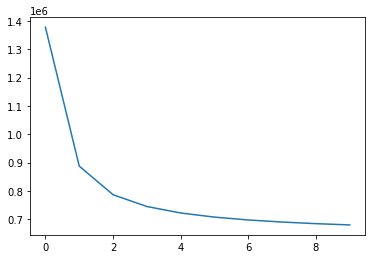

In [12]:
plt.plot(costs)
plt.show()

In [13]:
# lets save our weights
np.savez(PATH+'weights.npz' , W, U,costs)
# and word2idx
with open(PATH+'word2idx.json' , 'w') as f:
    json.dump(word2idx, f)

In [3]:
# load weights
npz = np.load(PATH+'weights.npz')
W,U,costs = npz['arr_0'],npz['arr_1'],npz['arr_2'],
# lpad word2idx
with open(PATH+'word2idx.json') as f:
    word2idx = json.load(f)

In [4]:
def get_analogy(w1,w2,w4):
    E = (W+U)/2
    print('using averaged weight matricies : ')
    analogy(E,word2idx,w1,w2,w4)
    print('------------------------------------------')
    E = np.concatenate((W,U),axis=1)
    print('using concatenated weight matricies : ')
    analogy(E,word2idx,w1,w2,w4)
    print('------------------------------------------')
    print('------------------------------------------')



# king - man = ? - woman
def analogy(E,word2idx,w1,w2,w4):
    # first lets get our vector
    D = E.shape[1]
    king = word2idx.get(w1,None)
    man = word2idx.get(w2,None)
    woman = word2idx.get(w4,None)
    if king is None or man is None or woman is None:
        print('word not in dictionary')
        return
    king = E[king]
    man = E[man]
    woman = E[woman]
    queen = king - man + woman

    # next we calculate the distance between our vector and all other vectors
    # once using euclidean distance then again using cosine
    idx2word = {v:k for k,v in word2idx.items()}
    metrics = ['euclidean','cosine']

    for metric in metrics:
        distances = pairwise_distances(queen.reshape(1,D),E,metric=metric)
        # now we need to consider the 4 closest neighbours to that point
        # not to return a word in [w1,w2,w4]
        closest =  np.argpartition(distances[0], 4)[:4]
        closest = [idx2word[i] for i in closest]

        for word in closest:
            if word not in [w1,w2,w4]:
                print(metric,' distance :',w1,"-",w2,'=',word,'-',w4)
                break


In [7]:
get_analogy('king', 'man', 'woman')
get_analogy('france', 'paris', 'london')
get_analogy('france', 'paris', 'rome')
get_analogy('paris', 'france', 'italy')
get_analogy('france', 'french', 'english')
get_analogy('japan', 'japanese', 'chinese')
get_analogy('japan', 'japanese', 'italian')
get_analogy('japan', 'japanese', 'australian')
get_analogy('december', 'november', 'june')
get_analogy('true', 'false',  'bad')
get_analogy('woman', 'man',  'male')
get_analogy('king', 'emperor',  'empire')
get_analogy('north', 'south',  'west')
get_analogy('six', 'five',  'three')
get_analogy('summer', 'hot',  'cold')
get_analogy('christianity', 'bible',  'quran')
get_analogy('arabic', 'arab',  'american')
get_analogy('proton', 'electron',  'negative')
get_analogy('king', 'prince', 'princess')
get_analogy('february', 'january',  'october')
get_analogy('heir', 'heiress',  'princess')
get_analogy('france', 'paris',  'tokyo')
get_analogy('france', 'paris',  'rome')
get_analogy('france', 'paris',  'berlin')
get_analogy('miami', 'florida', 'texas')
get_analogy('france', 'french',  'english')
get_analogy('japan', 'japanese',  'chinese')
get_analogy('china', 'chinese',  'american')
get_analogy('japan', 'japanese',  'italian')
get_analogy('japan', 'japanese',  'australian')
get_analogy('man', 'woman',  'mother')
get_analogy('nephew', 'niece',  'aunt')
get_analogy('man', 'woman', 'wife')
get_analogy('man', 'woman',  'actress')
# this one is interesting
get_analogy('true', 'false',  'say')

using averaged weight matricies : 
euclidean  distance : king - man = queen - woman
cosine  distance : king - man = son - woman
------------------------------------------
using concatenated weight matricies : 
euclidean  distance : king - man = queen - woman
cosine  distance : king - man = queen - woman
------------------------------------------
------------------------------------------
using averaged weight matricies : 
euclidean  distance : france - paris = england - london
cosine  distance : france - paris = england - london
------------------------------------------
using concatenated weight matricies : 
euclidean  distance : france - paris = germany - london
cosine  distance : france - paris = britain - london
------------------------------------------
------------------------------------------
using averaged weight matricies : 
euclidean  distance : france - paris = italy - rome
cosine  distance : france - paris = italy - rome
------------------------------------------
using con

cosine  distance : february - january = november - october
------------------------------------------
------------------------------------------
using averaged weight matricies : 
euclidean  distance : heir - heiress = prince - princess
cosine  distance : heir - heiress = prince - princess
------------------------------------------
using concatenated weight matricies : 
euclidean  distance : heir - heiress = prince - princess
cosine  distance : heir - heiress = prince - princess
------------------------------------------
------------------------------------------
using averaged weight matricies : 
euclidean  distance : france - paris = japan - tokyo
cosine  distance : france - paris = japan - tokyo
------------------------------------------
using concatenated weight matricies : 
euclidean  distance : france - paris = japan - tokyo
cosine  distance : france - paris = italy - tokyo
------------------------------------------
------------------------------------------
using averaged weight

<h1>Math</h1>

Now we want to return to the idea of applying SVD to GloVe

recall that SVD takes a matrix $X$ and computes a low rank approximation of it by decomposing it into three seperate matricies $W,S,U$ 

$$X = WSU^T$$

note : here we rename the variables to make them closer to what we use for matrix factorisation , typically for SVD we call the three matricies $U,S,V$ , but for now we will refer to them as $W,S,U$

---

<h4>Recommender Systems</h4>

we have an NxM matrix called $X$ (or $R$) and we are going to decompose it into three seperate matricies $W,S,U$

$shape(W) = N\times K$ : users matrix , each row corresponds to a different user , and  each of these rows , one for each user , is a K-size latent vector representing that user

$shape(S) = K\times K$ : diagonal matrix that tells us the variance of each of the K latent dimensions

we can think of variance as a proxy for importance , if the variance is higher , this means this latent dimension gives me more information


$Shape(U) = M \times K$ : movies matrix , each row corresponds to a different movie , each of these rows , one for each movie , is a K-size latent vector representing that movie

---

<h4>Structure is the same</h4>

Structurally there is only one minor difference between SVD and MF , SVD has three matricies whereas MF has only 2

Theoretically , we can just multiply $S$ by by $W$ or $U^T$ to get $W'$ or $U'$ , and they would look exactly the same

$$X = WSU^T = \left(WS\right)U^T = W^\prime U^T$$

so this brings the question : can we use SVD instead of MF on our co-occurrence matrix ? 

well , thats what we are going to try to do

---

<h4>SVD wont work in Recommender Systems</h4>

its worth remembering why SVD wont work in Recommender systems

recall that out ratings matrix is sparse in the sense that most of the values are missing whereas for our GloVe matrix its also sparse , but in the sense that most values are just zero , they are not missing since 0 is a legitimate value from our dataset meaning that two words never appear in each other context

In addition , SVD is not generally scalable using default implementations , so if our vocabulary size was too large , this would
not work

since we have already limited our vocabulary we know this will work

note : we can represent the co-occurrence matrix as a Scipy sparse matrix which would take up much less space , allowing use to use the full vocabulary size and then do SVD on this very large sparse matrix , but it still might take a long time

---

<h4>what about $f(X)$?</h4>

The next thing that makes this different from regular GloVe is that we cant incorporate $f(X)$

as we recall $f(X)$ is a weighting that we applied to the square error loss function which is a function of the co-occurence matrix itself

$$J = \sum^V_{i=1} \sum^V_{j=1} f\left(X_{ij}\right){\left(\log X_{ij} - \hat{\log X_{i,j}}\right)}^2$$

But SVD by default minimises the normal squared error

$$J = \sum^N_{i=1}\sum^D_{j=1} {\left(X_{ij}-\hat X_{ij}\right)}^2$$

We dont know of a way to apply this weighting in scikit learn so we are just going to ignore it for the purpose of this experiment (we will see that we still get good results)

---

<h4>In Code</h4>

now we can start thinking about how we would implement this in code

we will be using the TruncatedSVD class which is a part of scikit-learn

TruncatedSVD
<ul>
    <li>fit(X) : find W,S,U</li>
    <li>Z = transform(X) : linear transformation on X , Z = XU</li>
</ul>

but we do not care about Z , we want W m unfortunately scikit-learn's SVD doesnot save SVD when fitting

---

<h4>(Re)Finding W</h4>

now lets try to reconstruct $W$ using $Z$

we have $X$ which is our input data 

$$X = WSU^T$$

we call .fit_transform(X) which finds $W,S,U$ but doesnot save W and instead just gives us back $Z$

$$Z = XU$$

we can plugin the expression for $X$ to get :

$$Z = \left(WSU^T\right)U$$

we know that $U^TU = I$ so that goes away

$$Z = WS$$

luckily $S$ is a diagonal matrix so it is very easy to invert , now we get

$$W = ZS^{-1}$$

---

<h4>Scikit-Learn</h4>

The next thing to do is figure out how $S$ and $U$ are stored in code , reading the documentation we find that

$U$ is refered to as ```model.compnents_```

$S$ is refered to as ```model.explained_variance_```

note : since $S$ is a diagonal matrix , it is just stored as a 1-D array (we can use np.diag() to turn it back to a diagonal matrix)

note : no bias terms are added

<h1>code</h1>

In [1]:
# lets reload the data the same way as before
# then we change the train function

In [2]:
import numpy as np
from glob import glob
import string
from sklearn.metrics.pairwise import pairwise_distances
from datetime import datetime
import json
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

In [3]:
V = 20000
D = 300
N_FILES = None
CONTEXT_SZ = 10
XMAX = 100
ALPHA = 0.75
EPOCHS = 10
REG = 0.1
PATH = 'outputs/GloVe/SVD/'

In [4]:
def tokenise(sent):
    sent = sent.lower()
    sent = sent.translate(str.maketrans('','',string.punctuation))
    tokens = sent.split()
    return tokens

def get_sentences(path='datasets/wiki/',V=20000,n_files=None):
    files = glob(path+'*.txt')
    files = files[:n_files]
    # first we need to get word2count to identify our top words
    # we will make word2idx once we filter out the top words
    word2count = {}

    # this is a list of lists , each inner list is a sentence of indexes
    sentences = []

    # we need to limit covabulary
    # first we get word2count 
    print('counting words')

    for i,f in enumerate(files):
        for line in open(f,encoding = "utf8"):
            line = line.rstrip()
            if line and line[0] not in ('[', '*', '-', '|', '=', '{', '}'):
                # use lines instead of sentences
                lines = line.split('. ')
                for line in lines:
                    tokens = tokenise(line)
                    if len(tokens) < 2:
                        continue
                    for token in tokens:
                        word2count[token] = word2count.get(token,0) + 1

        print('finished counting : ',i+1,'/',len(files),' files')

    print('finisehd counting')
    print('processing files')

    # now we use word2count to identify most frequent words
    # we need the special <none> token to replace words that wont make it to our vocabulary
    words  = ['<start>']+['<end>']+['<none>'] + [w for (w,c) in sorted(word2count.items() , reverse=True, key=lambda x: x[1])[:V-3]] 
    word2idx = {w:i for w,i in zip(words,range(V))}
    none = word2idx['<none>']
    for i,f in enumerate(files):
        # in the wiki files each line is a paragraph , we will be taking each paragraph as a sentence
        # we also want to remove header lines
        for line in open(f,encoding = "utf8"):
            line = line.rstrip()
            # skip headers , ...
            if line and line[0] not in ('[', '*', '-', '|', '=', '{', '}'):
                lines = line.split('. ')
                for line in lines:
                    tokens = tokenise(line)
                    if len(tokens) < 2:
                        continue
                    # now we update word2idx and word2count
                    # and we append tokenised line to our sentences
                    sentence = [word2idx.get(token,none) for token in tokens]
                    sentences.append(sentence)

        print('finished processing : ',i+1,'/',len(files),' files')

    print('finished processing data')
    return sentences,word2idx



In [5]:
sentences,word2idx = get_sentences(V=V,n_files=N_FILES)

counting words
finished counting :  1 / 69  files
finished counting :  2 / 69  files
finished counting :  3 / 69  files
finished counting :  4 / 69  files
finished counting :  5 / 69  files
finished counting :  6 / 69  files
finished counting :  7 / 69  files
finished counting :  8 / 69  files
finished counting :  9 / 69  files
finished counting :  10 / 69  files
finished counting :  11 / 69  files
finished counting :  12 / 69  files
finished counting :  13 / 69  files
finished counting :  14 / 69  files
finished counting :  15 / 69  files
finished counting :  16 / 69  files
finished counting :  17 / 69  files
finished counting :  18 / 69  files
finished counting :  19 / 69  files
finished counting :  20 / 69  files
finished counting :  21 / 69  files
finished counting :  22 / 69  files
finished counting :  23 / 69  files
finished counting :  24 / 69  files
finished counting :  25 / 69  files
finished counting :  26 / 69  files
finished counting :  27 / 69  files
finished counting :  2

In [6]:
def construct_co_occurrence_matrix(sentences):
    X = np.zeros((V,V))
    N_sentences = len(sentences)
    for k,sentence in enumerate(sentences):
        # just a print to keep progress
        if (k+1)%1000 == 0:
            print('finished: ',k+1,'/',N_sentences)
        N = len(sentence)
        for i in range(N):
            start = max(i-CONTEXT_SZ,0)
            end = min(N,i+CONTEXT_SZ+1)
            w1 = sentence[i]
            
            if i-CONTEXT_SZ < 0:
                dist = i+1
                X[0][w1] += 1/dist
                X[w1][0] += 1/dist
            
            if i+CONTEXT_SZ > N:
                dist = N-i
                X[1][w1] += 1/dist
                X[w1][1] += 1/dist
                
            for j in range(start,i):
                w2 = sentence[j]
                dist = i-j
                X[w1][w2] += 1/dist
                X[w2][w1] += 1/dist
                
            for j in range(i+1,end):
                w2 = sentence[j]
                dist = j-i
                X[w1][w2] += 1/dist
                X[w2][w1] += 1/dist
    return X

In [7]:
X = construct_co_occurrence_matrix(sentences)
# free some memory
sentences = []

finished:  1000 / 3919517
finished:  2000 / 3919517
finished:  3000 / 3919517
finished:  4000 / 3919517
finished:  5000 / 3919517
finished:  6000 / 3919517
finished:  7000 / 3919517
finished:  8000 / 3919517
finished:  9000 / 3919517
finished:  10000 / 3919517
finished:  11000 / 3919517
finished:  12000 / 3919517
finished:  13000 / 3919517
finished:  14000 / 3919517
finished:  15000 / 3919517
finished:  16000 / 3919517
finished:  17000 / 3919517
finished:  18000 / 3919517
finished:  19000 / 3919517
finished:  20000 / 3919517
finished:  21000 / 3919517
finished:  22000 / 3919517
finished:  23000 / 3919517
finished:  24000 / 3919517
finished:  25000 / 3919517
finished:  26000 / 3919517
finished:  27000 / 3919517
finished:  28000 / 3919517
finished:  29000 / 3919517
finished:  30000 / 3919517
finished:  31000 / 3919517
finished:  32000 / 3919517
finished:  33000 / 3919517
finished:  34000 / 3919517
finished:  35000 / 3919517
finished:  36000 / 3919517
finished:  37000 / 3919517
finished: 

finished:  298000 / 3919517
finished:  299000 / 3919517
finished:  300000 / 3919517
finished:  301000 / 3919517
finished:  302000 / 3919517
finished:  303000 / 3919517
finished:  304000 / 3919517
finished:  305000 / 3919517
finished:  306000 / 3919517
finished:  307000 / 3919517
finished:  308000 / 3919517
finished:  309000 / 3919517
finished:  310000 / 3919517
finished:  311000 / 3919517
finished:  312000 / 3919517
finished:  313000 / 3919517
finished:  314000 / 3919517
finished:  315000 / 3919517
finished:  316000 / 3919517
finished:  317000 / 3919517
finished:  318000 / 3919517
finished:  319000 / 3919517
finished:  320000 / 3919517
finished:  321000 / 3919517
finished:  322000 / 3919517
finished:  323000 / 3919517
finished:  324000 / 3919517
finished:  325000 / 3919517
finished:  326000 / 3919517
finished:  327000 / 3919517
finished:  328000 / 3919517
finished:  329000 / 3919517
finished:  330000 / 3919517
finished:  331000 / 3919517
finished:  332000 / 3919517
finished:  333000 / 

finished:  591000 / 3919517
finished:  592000 / 3919517
finished:  593000 / 3919517
finished:  594000 / 3919517
finished:  595000 / 3919517
finished:  596000 / 3919517
finished:  597000 / 3919517
finished:  598000 / 3919517
finished:  599000 / 3919517
finished:  600000 / 3919517
finished:  601000 / 3919517
finished:  602000 / 3919517
finished:  603000 / 3919517
finished:  604000 / 3919517
finished:  605000 / 3919517
finished:  606000 / 3919517
finished:  607000 / 3919517
finished:  608000 / 3919517
finished:  609000 / 3919517
finished:  610000 / 3919517
finished:  611000 / 3919517
finished:  612000 / 3919517
finished:  613000 / 3919517
finished:  614000 / 3919517
finished:  615000 / 3919517
finished:  616000 / 3919517
finished:  617000 / 3919517
finished:  618000 / 3919517
finished:  619000 / 3919517
finished:  620000 / 3919517
finished:  621000 / 3919517
finished:  622000 / 3919517
finished:  623000 / 3919517
finished:  624000 / 3919517
finished:  625000 / 3919517
finished:  626000 / 

finished:  884000 / 3919517
finished:  885000 / 3919517
finished:  886000 / 3919517
finished:  887000 / 3919517
finished:  888000 / 3919517
finished:  889000 / 3919517
finished:  890000 / 3919517
finished:  891000 / 3919517
finished:  892000 / 3919517
finished:  893000 / 3919517
finished:  894000 / 3919517
finished:  895000 / 3919517
finished:  896000 / 3919517
finished:  897000 / 3919517
finished:  898000 / 3919517
finished:  899000 / 3919517
finished:  900000 / 3919517
finished:  901000 / 3919517
finished:  902000 / 3919517
finished:  903000 / 3919517
finished:  904000 / 3919517
finished:  905000 / 3919517
finished:  906000 / 3919517
finished:  907000 / 3919517
finished:  908000 / 3919517
finished:  909000 / 3919517
finished:  910000 / 3919517
finished:  911000 / 3919517
finished:  912000 / 3919517
finished:  913000 / 3919517
finished:  914000 / 3919517
finished:  915000 / 3919517
finished:  916000 / 3919517
finished:  917000 / 3919517
finished:  918000 / 3919517
finished:  919000 / 

finished:  1171000 / 3919517
finished:  1172000 / 3919517
finished:  1173000 / 3919517
finished:  1174000 / 3919517
finished:  1175000 / 3919517
finished:  1176000 / 3919517
finished:  1177000 / 3919517
finished:  1178000 / 3919517
finished:  1179000 / 3919517
finished:  1180000 / 3919517
finished:  1181000 / 3919517
finished:  1182000 / 3919517
finished:  1183000 / 3919517
finished:  1184000 / 3919517
finished:  1185000 / 3919517
finished:  1186000 / 3919517
finished:  1187000 / 3919517
finished:  1188000 / 3919517
finished:  1189000 / 3919517
finished:  1190000 / 3919517
finished:  1191000 / 3919517
finished:  1192000 / 3919517
finished:  1193000 / 3919517
finished:  1194000 / 3919517
finished:  1195000 / 3919517
finished:  1196000 / 3919517
finished:  1197000 / 3919517
finished:  1198000 / 3919517
finished:  1199000 / 3919517
finished:  1200000 / 3919517
finished:  1201000 / 3919517
finished:  1202000 / 3919517
finished:  1203000 / 3919517
finished:  1204000 / 3919517
finished:  120

finished:  1454000 / 3919517
finished:  1455000 / 3919517
finished:  1456000 / 3919517
finished:  1457000 / 3919517
finished:  1458000 / 3919517
finished:  1459000 / 3919517
finished:  1460000 / 3919517
finished:  1461000 / 3919517
finished:  1462000 / 3919517
finished:  1463000 / 3919517
finished:  1464000 / 3919517
finished:  1465000 / 3919517
finished:  1466000 / 3919517
finished:  1467000 / 3919517
finished:  1468000 / 3919517
finished:  1469000 / 3919517
finished:  1470000 / 3919517
finished:  1471000 / 3919517
finished:  1472000 / 3919517
finished:  1473000 / 3919517
finished:  1474000 / 3919517
finished:  1475000 / 3919517
finished:  1476000 / 3919517
finished:  1477000 / 3919517
finished:  1478000 / 3919517
finished:  1479000 / 3919517
finished:  1480000 / 3919517
finished:  1481000 / 3919517
finished:  1482000 / 3919517
finished:  1483000 / 3919517
finished:  1484000 / 3919517
finished:  1485000 / 3919517
finished:  1486000 / 3919517
finished:  1487000 / 3919517
finished:  148

finished:  1737000 / 3919517
finished:  1738000 / 3919517
finished:  1739000 / 3919517
finished:  1740000 / 3919517
finished:  1741000 / 3919517
finished:  1742000 / 3919517
finished:  1743000 / 3919517
finished:  1744000 / 3919517
finished:  1745000 / 3919517
finished:  1746000 / 3919517
finished:  1747000 / 3919517
finished:  1748000 / 3919517
finished:  1749000 / 3919517
finished:  1750000 / 3919517
finished:  1751000 / 3919517
finished:  1752000 / 3919517
finished:  1753000 / 3919517
finished:  1754000 / 3919517
finished:  1755000 / 3919517
finished:  1756000 / 3919517
finished:  1757000 / 3919517
finished:  1758000 / 3919517
finished:  1759000 / 3919517
finished:  1760000 / 3919517
finished:  1761000 / 3919517
finished:  1762000 / 3919517
finished:  1763000 / 3919517
finished:  1764000 / 3919517
finished:  1765000 / 3919517
finished:  1766000 / 3919517
finished:  1767000 / 3919517
finished:  1768000 / 3919517
finished:  1769000 / 3919517
finished:  1770000 / 3919517
finished:  177

finished:  2020000 / 3919517
finished:  2021000 / 3919517
finished:  2022000 / 3919517
finished:  2023000 / 3919517
finished:  2024000 / 3919517
finished:  2025000 / 3919517
finished:  2026000 / 3919517
finished:  2027000 / 3919517
finished:  2028000 / 3919517
finished:  2029000 / 3919517
finished:  2030000 / 3919517
finished:  2031000 / 3919517
finished:  2032000 / 3919517
finished:  2033000 / 3919517
finished:  2034000 / 3919517
finished:  2035000 / 3919517
finished:  2036000 / 3919517
finished:  2037000 / 3919517
finished:  2038000 / 3919517
finished:  2039000 / 3919517
finished:  2040000 / 3919517
finished:  2041000 / 3919517
finished:  2042000 / 3919517
finished:  2043000 / 3919517
finished:  2044000 / 3919517
finished:  2045000 / 3919517
finished:  2046000 / 3919517
finished:  2047000 / 3919517
finished:  2048000 / 3919517
finished:  2049000 / 3919517
finished:  2050000 / 3919517
finished:  2051000 / 3919517
finished:  2052000 / 3919517
finished:  2053000 / 3919517
finished:  205

finished:  2303000 / 3919517
finished:  2304000 / 3919517
finished:  2305000 / 3919517
finished:  2306000 / 3919517
finished:  2307000 / 3919517
finished:  2308000 / 3919517
finished:  2309000 / 3919517
finished:  2310000 / 3919517
finished:  2311000 / 3919517
finished:  2312000 / 3919517
finished:  2313000 / 3919517
finished:  2314000 / 3919517
finished:  2315000 / 3919517
finished:  2316000 / 3919517
finished:  2317000 / 3919517
finished:  2318000 / 3919517
finished:  2319000 / 3919517
finished:  2320000 / 3919517
finished:  2321000 / 3919517
finished:  2322000 / 3919517
finished:  2323000 / 3919517
finished:  2324000 / 3919517
finished:  2325000 / 3919517
finished:  2326000 / 3919517
finished:  2327000 / 3919517
finished:  2328000 / 3919517
finished:  2329000 / 3919517
finished:  2330000 / 3919517
finished:  2331000 / 3919517
finished:  2332000 / 3919517
finished:  2333000 / 3919517
finished:  2334000 / 3919517
finished:  2335000 / 3919517
finished:  2336000 / 3919517
finished:  233

finished:  2586000 / 3919517
finished:  2587000 / 3919517
finished:  2588000 / 3919517
finished:  2589000 / 3919517
finished:  2590000 / 3919517
finished:  2591000 / 3919517
finished:  2592000 / 3919517
finished:  2593000 / 3919517
finished:  2594000 / 3919517
finished:  2595000 / 3919517
finished:  2596000 / 3919517
finished:  2597000 / 3919517
finished:  2598000 / 3919517
finished:  2599000 / 3919517
finished:  2600000 / 3919517
finished:  2601000 / 3919517
finished:  2602000 / 3919517
finished:  2603000 / 3919517
finished:  2604000 / 3919517
finished:  2605000 / 3919517
finished:  2606000 / 3919517
finished:  2607000 / 3919517
finished:  2608000 / 3919517
finished:  2609000 / 3919517
finished:  2610000 / 3919517
finished:  2611000 / 3919517
finished:  2612000 / 3919517
finished:  2613000 / 3919517
finished:  2614000 / 3919517
finished:  2615000 / 3919517
finished:  2616000 / 3919517
finished:  2617000 / 3919517
finished:  2618000 / 3919517
finished:  2619000 / 3919517
finished:  262

finished:  2869000 / 3919517
finished:  2870000 / 3919517
finished:  2871000 / 3919517
finished:  2872000 / 3919517
finished:  2873000 / 3919517
finished:  2874000 / 3919517
finished:  2875000 / 3919517
finished:  2876000 / 3919517
finished:  2877000 / 3919517
finished:  2878000 / 3919517
finished:  2879000 / 3919517
finished:  2880000 / 3919517
finished:  2881000 / 3919517
finished:  2882000 / 3919517
finished:  2883000 / 3919517
finished:  2884000 / 3919517
finished:  2885000 / 3919517
finished:  2886000 / 3919517
finished:  2887000 / 3919517
finished:  2888000 / 3919517
finished:  2889000 / 3919517
finished:  2890000 / 3919517
finished:  2891000 / 3919517
finished:  2892000 / 3919517
finished:  2893000 / 3919517
finished:  2894000 / 3919517
finished:  2895000 / 3919517
finished:  2896000 / 3919517
finished:  2897000 / 3919517
finished:  2898000 / 3919517
finished:  2899000 / 3919517
finished:  2900000 / 3919517
finished:  2901000 / 3919517
finished:  2902000 / 3919517
finished:  290

finished:  3152000 / 3919517
finished:  3153000 / 3919517
finished:  3154000 / 3919517
finished:  3155000 / 3919517
finished:  3156000 / 3919517
finished:  3157000 / 3919517
finished:  3158000 / 3919517
finished:  3159000 / 3919517
finished:  3160000 / 3919517
finished:  3161000 / 3919517
finished:  3162000 / 3919517
finished:  3163000 / 3919517
finished:  3164000 / 3919517
finished:  3165000 / 3919517
finished:  3166000 / 3919517
finished:  3167000 / 3919517
finished:  3168000 / 3919517
finished:  3169000 / 3919517
finished:  3170000 / 3919517
finished:  3171000 / 3919517
finished:  3172000 / 3919517
finished:  3173000 / 3919517
finished:  3174000 / 3919517
finished:  3175000 / 3919517
finished:  3176000 / 3919517
finished:  3177000 / 3919517
finished:  3178000 / 3919517
finished:  3179000 / 3919517
finished:  3180000 / 3919517
finished:  3181000 / 3919517
finished:  3182000 / 3919517
finished:  3183000 / 3919517
finished:  3184000 / 3919517
finished:  3185000 / 3919517
finished:  318

finished:  3435000 / 3919517
finished:  3436000 / 3919517
finished:  3437000 / 3919517
finished:  3438000 / 3919517
finished:  3439000 / 3919517
finished:  3440000 / 3919517
finished:  3441000 / 3919517
finished:  3442000 / 3919517
finished:  3443000 / 3919517
finished:  3444000 / 3919517
finished:  3445000 / 3919517
finished:  3446000 / 3919517
finished:  3447000 / 3919517
finished:  3448000 / 3919517
finished:  3449000 / 3919517
finished:  3450000 / 3919517
finished:  3451000 / 3919517
finished:  3452000 / 3919517
finished:  3453000 / 3919517
finished:  3454000 / 3919517
finished:  3455000 / 3919517
finished:  3456000 / 3919517
finished:  3457000 / 3919517
finished:  3458000 / 3919517
finished:  3459000 / 3919517
finished:  3460000 / 3919517
finished:  3461000 / 3919517
finished:  3462000 / 3919517
finished:  3463000 / 3919517
finished:  3464000 / 3919517
finished:  3465000 / 3919517
finished:  3466000 / 3919517
finished:  3467000 / 3919517
finished:  3468000 / 3919517
finished:  346

finished:  3718000 / 3919517
finished:  3719000 / 3919517
finished:  3720000 / 3919517
finished:  3721000 / 3919517
finished:  3722000 / 3919517
finished:  3723000 / 3919517
finished:  3724000 / 3919517
finished:  3725000 / 3919517
finished:  3726000 / 3919517
finished:  3727000 / 3919517
finished:  3728000 / 3919517
finished:  3729000 / 3919517
finished:  3730000 / 3919517
finished:  3731000 / 3919517
finished:  3732000 / 3919517
finished:  3733000 / 3919517
finished:  3734000 / 3919517
finished:  3735000 / 3919517
finished:  3736000 / 3919517
finished:  3737000 / 3919517
finished:  3738000 / 3919517
finished:  3739000 / 3919517
finished:  3740000 / 3919517
finished:  3741000 / 3919517
finished:  3742000 / 3919517
finished:  3743000 / 3919517
finished:  3744000 / 3919517
finished:  3745000 / 3919517
finished:  3746000 / 3919517
finished:  3747000 / 3919517
finished:  3748000 / 3919517
finished:  3749000 / 3919517
finished:  3750000 / 3919517
finished:  3751000 / 3919517
finished:  375

In [8]:
logX = np.log(X+1)
less = X<XMAX
not_less = np.logical_not(less)

X[less] = (X[less]/XMAX)**ALPHA
X[not_less] = 1
fX = X
mu = logX.mean()

In [9]:
# lets rewrite our train function
def train():
    model = TruncatedSVD(n_components=D)
    t0 = datetime.now()
    # fit
    Z = model.fit_transform(logX-mu)
    U = model.components_
    S = model.explained_variance_
    S_inv = np.linalg.inv(np.diag(S))
    W = Z@S_inv
    cost = np.sum((W@U+mu-logX)**2)
    print(' cost : ',cost,' time : ',datetime.now()-t0)
    return W,U

In [10]:
W,U = train()

 cost :  108086610.92373331  time :  0:01:14.792350


In [11]:
# lets save our weights
np.savez(PATH+'weights.npz' , W, U)
# and word2idx
with open(PATH+'word2idx.json' , 'w') as f:
    json.dump(word2idx, f)

In [12]:
# load weights
npz = np.load(PATH+'weights.npz')
W,U = npz['arr_0'],npz['arr_1'].T
# lpad word2idx
with open(PATH+'word2idx.json') as f:
    word2idx = json.load(f)

In [13]:
def get_analogy(w1,w2,w4):
    E = (W+U)/2
    print('using averaged weight matricies : ')
    analogy(E,word2idx,w1,w2,w4)
    print('------------------------------------------')
    E = np.concatenate((W,U),axis=1)
    print('using concatenated weight matricies : ')
    analogy(E,word2idx,w1,w2,w4)
    print('------------------------------------------')
    print('------------------------------------------')



# king - man = ? - woman
def analogy(E,word2idx,w1,w2,w4):
    # first lets get our vector
    D = E.shape[1]
    king = word2idx.get(w1,None)
    man = word2idx.get(w2,None)
    woman = word2idx.get(w4,None)
    if king is None or man is None or woman is None:
        print('word not in dictionary')
        return
    king = E[king]
    man = E[man]
    woman = E[woman]
    queen = king - man + woman

    # next we calculate the distance between our vector and all other vectors
    # once using euclidean distance then again using cosine
    idx2word = {v:k for k,v in word2idx.items()}
    metrics = ['euclidean','cosine']

    for metric in metrics:
        distances = pairwise_distances(queen.reshape(1,D),E,metric=metric)
        # now we need to consider the 4 closest neighbours to that point
        # not to return a word in [w1,w2,w4]
        closest =  np.argpartition(distances[0], 4)[:4]
        closest = [idx2word[i] for i in closest]

        for word in closest:
            if word not in [w1,w2,w4]:
                print(metric,' distance :',w1,"-",w2,'=',word,'-',w4)
                break




In [17]:
get_analogy('king', 'man', 'woman')
get_analogy('france', 'paris', 'london')
get_analogy('france', 'paris', 'rome')
get_analogy('paris', 'france', 'italy')
get_analogy('france', 'french', 'english')
get_analogy('japan', 'japanese', 'chinese')
get_analogy('japan', 'japanese', 'italian')
get_analogy('japan', 'japanese', 'australian')
get_analogy('december', 'november', 'june')
get_analogy('true', 'false',  'bad')
get_analogy('fix','break','black')
get_analogy('even','odd','3')
get_analogy('woman', 'man',  'male')
get_analogy('king', 'emperor',  'empire')
get_analogy('north', 'south',  'west')
get_analogy('mosque', 'church',  'christianity')
get_analogy('six', 'five',  'three')
get_analogy('summer', 'hot',  'cold')
get_analogy('fire', 'water',  'south')
get_analogy('christianity', 'bible',  'quran')
get_analogy('arabic', 'arab',  'american')
get_analogy('fly', 'flying',  'walking')
get_analogy('proton', 'electron',  'negative')
get_analogy('dc', 'superman',  'spiderman')
get_analogy('relativity', 'einstein',  'newton')
get_analogy('relativity', 'einstein',  'tesla')
get_analogy('king', 'prince', 'princess')
get_analogy('man', 'woman', 'she')
get_analogy('february', 'january',  'october')
get_analogy('heir', 'heiress',  'princess')
get_analogy('france', 'paris',  'tokyo')
get_analogy('france', 'paris',  'beijing')
get_analogy('france', 'paris',  'rome')
get_analogy('france', 'paris',  'berlin')
get_analogy('miami', 'florida', 'texas')
get_analogy('france', 'french',  'english')
get_analogy('japan', 'japanese',  'chinese')
get_analogy('china', 'chinese',  'american')
get_analogy('japan', 'japanese',  'italian')
get_analogy('japan', 'japanese',  'australian')
get_analogy('man', 'woman',  'mother')
get_analogy('old', 'young',  'son')
get_analogy('nephew', 'niece',  'aunt')
get_analogy('man', 'woman', 'wife')
get_analogy('man', 'woman',  'actress')
# this one is interesting
get_analogy('true', 'false',  'say')

using averaged weight matricies : 
euclidean  distance : king - man = queen - woman
cosine  distance : king - man = queen - woman
------------------------------------------
using concatenated weight matricies : 
euclidean  distance : king - man = kingdom - woman
cosine  distance : king - man = queen - woman
------------------------------------------
------------------------------------------
using averaged weight matricies : 
euclidean  distance : france - paris = england - london
cosine  distance : france - paris = england - london
------------------------------------------
using concatenated weight matricies : 
euclidean  distance : france - paris = england - london
cosine  distance : france - paris = england - london
------------------------------------------
------------------------------------------
using averaged weight matricies : 
euclidean  distance : france - paris = italy - rome
cosine  distance : france - paris = italy - rome
------------------------------------------
using

using averaged weight matricies : 
euclidean  distance : arabic - arab = parishes - american
cosine  distance : arabic - arab = us - american
------------------------------------------
using concatenated weight matricies : 
euclidean  distance : arabic - arab = united - american
cosine  distance : arabic - arab = united - american
------------------------------------------
------------------------------------------
using averaged weight matricies : 
euclidean  distance : fly - flying = walk - walking
cosine  distance : fly - flying = walk - walking
------------------------------------------
using concatenated weight matricies : 
euclidean  distance : fly - flying = walk - walking
cosine  distance : fly - flying = walk - walking
------------------------------------------
------------------------------------------
using averaged weight matricies : 
euclidean  distance : proton - electron = positive - negative
cosine  distance : proton - electron = favorable - negative
-------------------

cosine  distance : japan - japanese = australia - australian
------------------------------------------
------------------------------------------
using averaged weight matricies : 
euclidean  distance : man - woman = father - mother
cosine  distance : man - woman = father - mother
------------------------------------------
using concatenated weight matricies : 
euclidean  distance : man - woman = father - mother
cosine  distance : man - woman = father - mother
------------------------------------------
------------------------------------------
using averaged weight matricies : 
euclidean  distance : old - young = father - son
cosine  distance : old - young = father - son
------------------------------------------
using concatenated weight matricies : 
euclidean  distance : old - young = father - son
cosine  distance : old - young = father - son
------------------------------------------
------------------------------------------
using averaged weight matricies : 
euclidean  distance 

In [18]:
# UNBELIEVABLE !!!
# The fact that we can get such good results in only about a minute of training !!!